# Simulatie dobbelen

<div>
<img src="dice.jpg" width="500"/>
</div>

## Steekproef versus populatie

### Opzet:
- Gooi n maal met een dobbelsteen.
- Bereken het gemiddelde en de standaarddeviatie.
- Doe dit voor n=2, n=4, n=8, n=16 etc.

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Opmerking: De code van dit notebook heb ik bewust verborgen om het leesbaarder te maken.
Als je de code toch wil zien klik dan <a href="javascript:code_toggle()">hier</a>.''')

In [2]:
import random
import statistics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display, HTML

ogen = (1, 2, 3, 4, 5, 6)
aantal_worpen = [2**i for i in range(1, 16)]

def werp_dobbelsteen(aantal_worpen):
    verzameling_ogen = []
    for i in range(aantal_worpen):
        verzameling_ogen.append(random.choice(ogen))
    return verzameling_ogen

data = []
for worpen in aantal_worpen:
    resultaat = werp_dobbelsteen(worpen)
    mean = round(statistics.mean(resultaat), 2)
    stdev = round(statistics.stdev(resultaat), 2)
    data.append([worpen, mean, stdev])
df = pd.DataFrame(data, columns=["Worpen", "Gemiddelde", "Stdev"])
display(df)

,Worpen,Gemiddelde,Stdev
0,2,5.50,0.71
1,4,2.25,2.50
2,8,3.75,1.75
3,16,3.75,1.98
4,32,3.03,1.73
5,64,3.66,1.75
6,128,3.48,1.59
7,256,3.45,1.74
8,512,3.60,1.72
9,1024,3.50,1.70


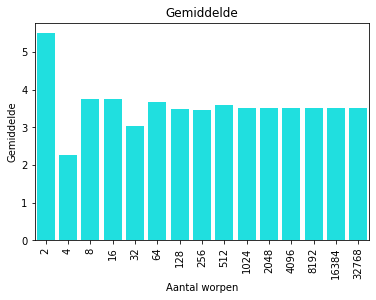

In [3]:
sns.barplot(x=df["Worpen"], y=df["Gemiddelde"], color='cyan').set(title='Gemiddelde', xlabel='Aantal worpen', ylabel='Gemiddelde')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

### Wat zie gebeuren?  
> Naarmate het aantal keren dat je dobbelt groter wordt verschuift het gemiddelde van de steekproef steeds dichter naar het gemiddelde van de populatie (deze waarde is 3,5). Ofwel: $\overline{y}$ verschuift naar $\mu$ naarmate $n$ toeneemt.

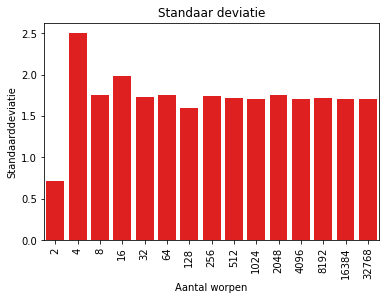

In [4]:
sns.barplot(x=df["Worpen"], y=df["Stdev"], color='red').set(title='Standaar deviatie', xlabel='Aantal worpen', ylabel='Standaarddeviatie')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

### Wat zie je gebeuren?
> Naarmate het aantal keren dat je dobbelt groter wordt verschuift de standaarddeviatie van de steekproef steeds dichter naar de standaarddeviatie van de populatie (deze waarde is 1,7). Ofwel: $s$ verschuift naar $\sigma$ naarmate $n$ toeneemt.

## Herhaald 6 keer gooien en het gemiddelde en de standaarddeviatie berekenen.

### Opzet:
- gooi zesmaal met een dobbelsteen
- bereken het gemiddelde
- herhaal dit 100, 1000, 10000 en 100000 maal
- maak een histogram waarbij de frequentie van het gemiddelde uitgezet wordt tegen de waarde van het gemiddelde.

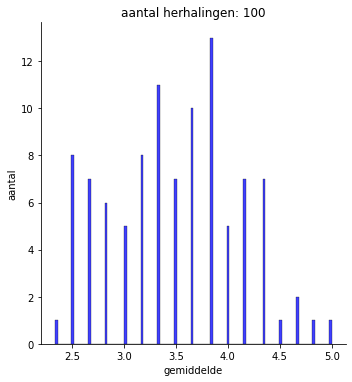

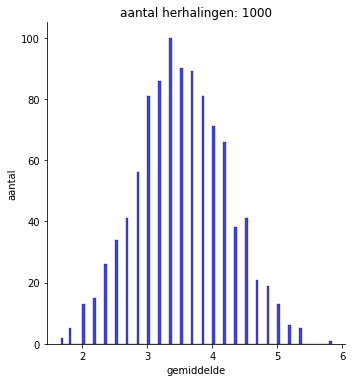

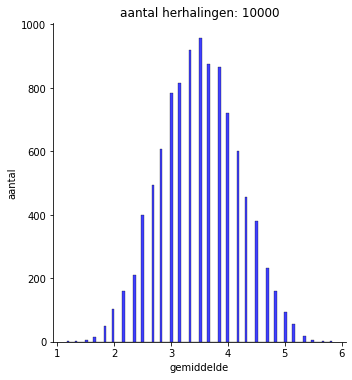

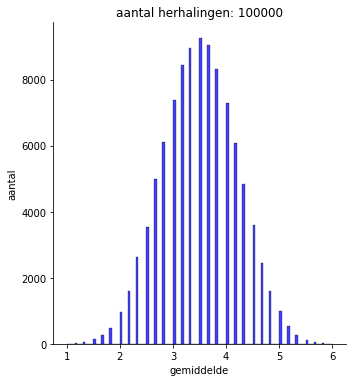

In [5]:
aantal_herhalingen = [100, 1000, 10000, 100000]
worpen_per_herhaling = 6
for herhalingen in aantal_herhalingen:
    gemiddelden = []
    for i in range(herhalingen):
        worpen = []
        for j in range(worpen_per_herhaling):
            worp = random.choice(ogen)
            worpen.append(worp)
        gemiddelden.append(statistics.mean(worpen))

    sns.displot(gemiddelden, 
                color = "blue", 
                bins = 100).set(title="aantal herhalingen: {}".format(herhalingen), 
                                ylabel="aantal", 
                                xlabel="gemiddelde")
    plt.show()

### Wat zie gebeuren?  
> Naarmate het aantal keren dat je **6 maal dobbelt en het gemiddelde berekent** groter wordt, zie je steeds duidelijker een normaalverdeling ontstaan. Feitelijk is het een binomiaalverdeling maar als $n$ groot wordt dan is de bionomiale verdeling bijna een normaalverdeling.

The end...

In [6]:
! jupyter nbconvert --to html dicer.ipynb

[NbConvertApp] Converting notebook dicer.ipynb to html
[NbConvertApp] Writing 665631 bytes to dicer.html
